# 類神經網路設計部分:
## 隱藏層為 5 層
## Learning rate 改為 0.085
## batch size 改為 120
## 訓練次數增加為 30

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from ipywidgets import interact_manual
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [3]:
print(f'訓練資料總筆數為 {len(x_train)} 筆資料',f'測試資料總筆數為 {len(x_test)} 筆資料',sep='\n')

訓練資料總筆數為 60000 筆資料
測試資料總筆數為 10000 筆資料


In [4]:
labelname_dict = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape,y_test.shape,sep='\n')

(60000, 10)
(10000, 10)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()
model.add(Dense(120,input_dim=784,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='mse',optimizer=SGD(lr=0.085),metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 120)               94200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_6 (Dense)              (None, 75)                7575      
_________________________________________________________________
dense_7 (Dense)              (None, 60)                4560      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                610       
Total params: 119,045
Trainable params: 119,045
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train,y_train,batch_size=120,epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0864 - accuracy: 0.2733
Epoch 2/30
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0651 - accuracy: 0.5079
Epoch 3/30
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0440 - accuracy: 0.6925
Epoch 4/30
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0366 - accuracy: 0.7556
Epoch 5/30
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0320 - accuracy: 0.7893
Epoch 6/30
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0289 - accuracy: 0.8065
Epoch 7/30
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0271 - accuracy: 0.8171
Epoch 8/30
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0258 - accuracy: 0.8247
Epoch 9/30
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0249 - accuracy: 0.8298
Epoch 10/30
60

In [21]:
result = model.predict_classes(x_test)

In [22]:
def show_xy(測試編號=0):
    ax = plt.gca()
    X = x_test[測試編號]
    plt.xticks([],[])
    plt.yticks([],[])
    plt.imshow(x_test[測試編號].reshape(28,28),cmap='Greys')
    print(f'神經網路預測的答案為: {labelname_dict[result[測試編號]]}')
interact_manual(show_xy,測試編號=(0,9999));

interactive(children=(IntSlider(value=0, description='測試編號', max=9999), Button(description='Run Interact', sty…

神經網路預測是: Pullover


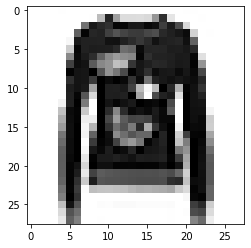

In [23]:
n=5000
print('神經網路預測是:',labelname_dict[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')